In [1]:
import pandas as pd
import numpy as np

profiles = pd.read_csv('profiles.csv')

print(profiles.columns)
#print(len(profiles))
print(profiles.head())
#print(profiles['sign'].value_counts())


Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college

In [153]:
#Data Wrangling and Tidying
 


print('\n body_type')
print(list(set(profiles['body_type'])))
profiles['body_type_fix'] = profiles['body_type'].replace(['overweight','used up', 'rather not say', 'a little extra', ],'bad')
profiles['body_type_fix'] = profiles['body_type_fix'].replace(['skinny',  'thin','curvy', 'full figured', 'average' ],'neutral')
profiles['body_type_fix'] = profiles['body_type_fix'].replace(['fit', 'jacked', 'athletic' ],'good')
print(list(set(profiles['body_type_fix'])))
profiles['body_type_num'] = profiles['body_type_fix'].replace('bad',0).replace('neutral',1).replace('good',2)
print(profiles['body_type_num'].value_counts())

print('\n diet')
print(list(set(profiles['diet'])))
profiles['diet_prop'] = profiles['diet'].replace(['strictly kosher','strictly vegan', 'strictly halal', 'strictly anything',
                                                'strictly vegetarian','strictly other'],'strictly')
profiles['diet_prop'] = profiles['diet_prop'].replace(['mostly anything','mostly kosher', 'mostly halal', 'mostly vegetarian',
                                                'mostly vegan','mostly other'],'mostly')
profiles['diet_prop'] = profiles['diet_prop'].replace(['anything','kosher', 'halal', 'vegetarian',
                                                'vegan','other'],'regular')

profiles['diet_kind'] = profiles['diet'].replace(['strictly kosher','mostly kosher', 'kosher'],'kosher')
profiles['diet_kind'] = profiles['diet_kind'].replace(['strictly halal','mostly halal', 'halal'],'halal')
profiles['diet_kind'] = profiles['diet_kind'].replace(['strictly vegan','mostly vegan', 'vegan'],'vegan')
profiles['diet_kind'] = profiles['diet_kind'].replace(['strictly vegetarian','mostly vegetarian', 'vegetarian'],'vegetarian')
profiles['diet_kind'] = profiles['diet_kind'].replace(['strictly anything','mostly anything', 'anything'],'anything')
profiles['diet_kind'] = profiles['diet_kind'].replace(['strictly other','mostly other', 'other'],'other')
print(list(set(profiles['diet_prop'])))
print(list(set(profiles['diet_kind'])))
print(profiles['diet_prop'].value_counts())
print(profiles['diet_kind'].value_counts())

print(list(set(profiles['drinks'])))
profiles['drinks_num'] = profiles['drinks'].replace('not at all',0).replace('rarely',1).replace('socially',2).replace('often',3).replace('very often',4).replace('desperately',5)
print(profiles['drinks_num'].value_counts())

print(list(set(profiles['drugs'])))
profiles['drugs_num'] = profiles['drugs'].replace('never',0).replace('sometimes',1).replace('often',2)
print(profiles['drugs_num'].value_counts())

#print(profiles['body_type'].value_counts())
print(list(set(profiles['sign'])))
#print(profiles['education'].value_counts())
#standardization
print(profiles['ethnicity'].value_counts())
print(list(set(profiles['ethnicity'])))
#print(len(list(set(profiles['ethnicity']))))
etnicity_main = ['white','asian', 'hispanic / latin', 'black','native american', 'middle eastern','pacific islander' ]
print(etnicity_main)
#profiles['ethnicity'].replace(profiles['ethnicity'] !=['white','asian', 'hispanic / latin', 'black','native american', 'middle eastern','pacific islander' ],'other')
profiles['ethnicity'] = profiles['ethnicity'].apply(lambda x : 'other' if x not in etnicity_main else x)
profiles['white']  = profiles['ethnicity'].apply(lambda x : 'other' if x !='white' else x)
print(profiles['ethnicity'].value_counts())
print(profiles['white'].value_counts())
profiles['sex_label'] = profiles['sex'].apply(lambda x: 1 if x == 'm' else 0)
profiles['white_label'] = profiles['white'].apply(lambda x: 1 if x == 'white' else 0)


 body_type
[nan, 'fit', 'jacked', 'used up', 'rather not say', 'thin', 'average', 'full figured', 'a little extra', 'curvy', 'overweight', 'athletic', 'skinny']
['good', nan, 'bad', 'neutral']
1.0    26073
2.0    24951
0.0     3626
Name: body_type_num, dtype: int64

 diet
[nan, 'strictly other', 'other', 'kosher', 'mostly kosher', 'mostly anything', 'mostly halal', 'mostly vegetarian', 'strictly halal', 'vegetarian', 'strictly anything', 'vegan', 'anything', 'strictly vegan', 'strictly vegetarian', 'halal', 'strictly kosher', 'mostly vegan', 'mostly other']
[nan, 'strictly', 'mostly', 'regular']
[nan, 'vegetarian', 'vegan', 'anything', 'other', 'halal', 'kosher']
mostly      21508
regular      7339
strictly     6704
Name: diet_prop, dtype: int64
anything      27881
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: diet_kind, dtype: int64
['not at all', nan, 'often', 'rarely', 'very often', 'desperately', 'socially']
2.0    41780


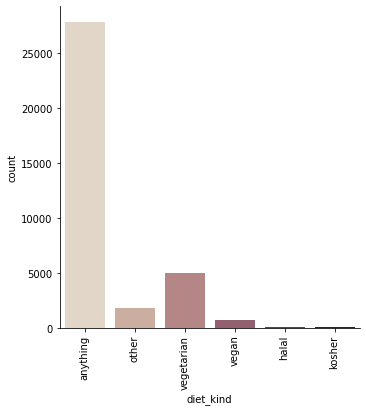

In [3]:
#graphs for data exploring
import matplotlib.pyplot as plt
import seaborn as sns
#Descriptive statistics like mean, median, range, correlations

sns.catplot(x="diet_kind", kind="count", palette="ch:.25", data=profiles)
plt.xticks(rotation=90)
plt.show()

1.811145531380631e-16


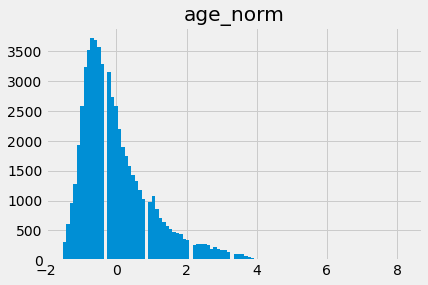

0
-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64
[80000, 20000, 40000, 60000, 1000000, 100000, 500000, 30000, 50000, 150000, 70000, 250000, -1]
-4.438965978416534e-17


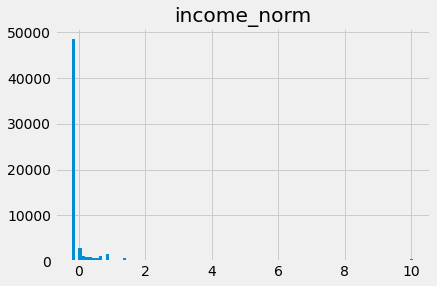

0
-2.9137159327486043e-15


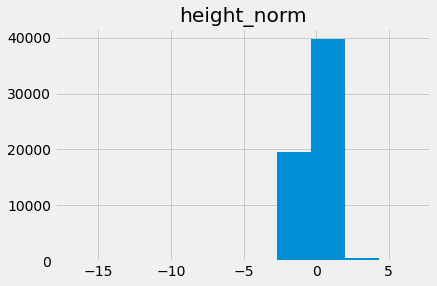

0
3.6768150774494226e-16


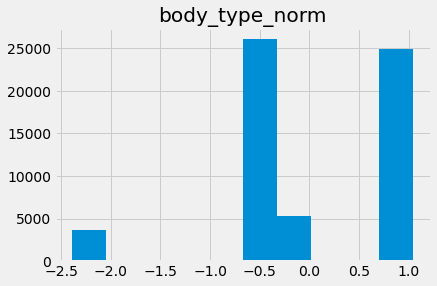

0
7.063823163784601e-16


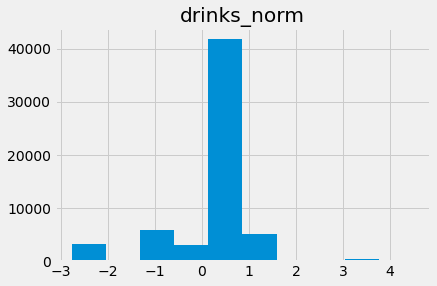

drinks_norm na
0
1.8953021627471393e-16


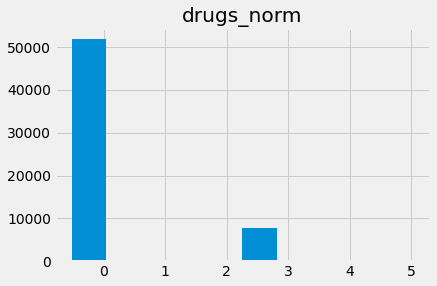

0
0
0
[nan, 'working on masters program', 'working on college/university', 'dropped out of med school', 'graduated from law school', 'graduated from high school', 'space camp', 'graduated from masters program', 'graduated from college/university', 'dropped out of law school', 'dropped out of two-year college', 'dropped out of college/university', 'dropped out of high school', 'ph.d program', 'graduated from ph.d program', 'dropped out of space camp', 'dropped out of ph.d program', 'working on law school', 'working on two-year college', 'working on ph.d program', 'graduated from two-year college', 'working on high school', 'high school', 'graduated from space camp', 'med school', 'masters program', 'law school', 'two-year college', 'working on med school', 'dropped out of masters program', 'graduated from med school', 'college/university', 'working on space camp']


<Figure size 432x288 with 0 Axes>

In [226]:
#standarizing quantitative data
from sklearn.preprocessing import StandardScaler
#age, income, height, body_type_num, drinks_num, drugs_num, sex_label, white_label
#age
#age.numpy.reshape(-1, 1)
profiles['age_norm'] = StandardScaler().fit_transform(profiles['age'].values.reshape(-1, 1))
print(np.mean(profiles['age_norm']))
plt.hist(profiles['age_norm'],bins = 100)
plt.title('age_norm')
plt.show()
plt.clf()
#print(age)
print(profiles['age_norm'].isna().sum())

# income
print(profiles['income'].value_counts())
print(list(set(profiles['income'])))

profiles['income_norm'] = StandardScaler().fit_transform(profiles['income'].values.reshape(-1, 1))
print(np.mean(profiles['income_norm']))
plt.hist(profiles['income_norm'],bins = 100)
plt.title('income_norm')
plt.show()
plt.clf()
#height
profiles['height'].fillna((profiles['height'].mean()), inplace=True)
print(profiles['height'].isna().sum())
profiles['height_norm'] = StandardScaler().fit_transform(profiles['height'].values.reshape(-1, 1))
print(np.mean(profiles['height_norm']))
plt.hist(profiles['height_norm'])
plt.title('height_norm')
plt.show()
plt.clf()
print(profiles['height_norm'].isna().sum())

#body type
profiles['body_type_num'].fillna((profiles['body_type_num'].mean()), inplace=True)
profiles['body_type_norm'] = StandardScaler().fit_transform(profiles['body_type_num'].values.reshape(-1, 1))
print(np.mean(profiles['body_type_norm']))
plt.hist(profiles['body_type_norm'])
plt.title('body_type_norm')
plt.show()
plt.clf()
print(profiles['body_type_norm'].isna().sum())

#drinks
profiles['drinks_num'].fillna((profiles['drinks_num'].mean()), inplace=True)
profiles['drinks_norm'] = StandardScaler().fit_transform(profiles['drinks_num'].values.reshape(-1, 1))
print(np.mean(profiles['drinks_norm']))
plt.hist(profiles['drinks_norm'])
plt.title('drinks_norm')
plt.show()
plt.clf()
print('drinks_norm na')
print(profiles['drinks_norm'].isna().sum())

#drugs
profiles['drugs_num'].fillna((profiles['drugs_num'].mean()), inplace=True)
profiles['drugs_norm'] = StandardScaler().fit_transform(profiles['drugs_num'].values.reshape(-1, 1))
print(np.mean(profiles['drugs_norm']))
plt.hist(profiles['drugs_norm'])
plt.title('drugs_norm')
plt.show()
plt.clf()
print(profiles['drugs_norm'].isna().sum())

#white
white_label = profiles['white_label']
print(profiles['white_label'].isna().sum())

# gender
sex_label = profiles['sex_label'] 
print(profiles['sex_label'].isna().sum())

print(list(set(profiles['education'])))



[nan, 'working on masters program', 'working on college/university', 'dropped out of med school', 'graduated from law school', 'graduated from high school', 'space camp', 'graduated from masters program', 'graduated from college/university', 'dropped out of law school', 'dropped out of two-year college', 'dropped out of college/university', 'dropped out of high school', 'ph.d program', 'graduated from ph.d program', 'dropped out of space camp', 'dropped out of ph.d program', 'working on law school', 'working on two-year college', 'working on ph.d program', 'graduated from two-year college', 'working on high school', 'high school', 'graduated from space camp', 'med school', 'masters program', 'law school', 'two-year college', 'working on med school', 'dropped out of masters program', 'graduated from med school', 'college/university', 'working on space camp']


59946
[2 1 2 ... 0 1 0]
[[ 1.64406594 -0.09624295 -0.06783571 -0.58425311  0.69733408  0.53831096]
 [-0.31614773  0.67344599  0.51938205  0.16295568  0.56661212  0.90886259]
 [-0.4067088  -0.72649169 -0.56328085  0.08655804  0.45599198  0.26897424]]


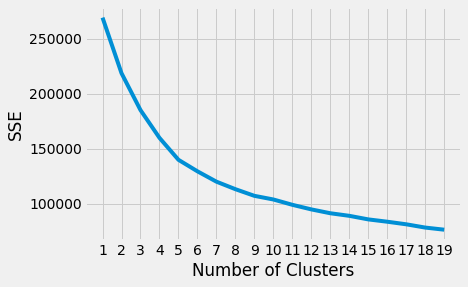

In [234]:
#creating n clusters by age, height, body_type_num, drinks_num, drugs_num, sex_label, white_label

from sklearn.cluster import KMeans
from kneed import KneeLocator
#classify Zodiac signs using drinking, smoking, drugs, and essays as the features
#Problem: e.g., Zodiac symbols are important for many users, but some users don’t add them in.
#How ML will be used: e.g., Let’s see if there are important variables that can predict a user’s zodiac signs so we
#can guess the missing zodiacs when we make matches.
#check religion / diet_kind / diet_prop / sign / drinks by essays
kmeans_data = profiles[['age_norm', 'height_norm', 'body_type_norm', 'drinks_norm', 'white_label', 'sex_label'] ]
print(len(kmeans_data))
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=10, max_iter=300,  random_state=42 )
kmeans.fit(kmeans_data)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

kmeans_kwargs = {"init": "k-means++",
                 "n_init": 10,
                 "max_iter": 300,
                 "random_state": 42 }


sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(kmeans_data)
    sse.append(kmeans.inertia_)

    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [237]:
# classify male / female by kernel

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


kernel_data = profiles[['age', 'height','body_type_num', 'drinks_num', 'drugs_num', 'white_label']]
#print(len(kernel_data))
training_data, validation_data, training_labels, validation_labels = train_test_split(kernel_data,  profiles['sex_label'], train_size = 0.8, test_size = 0.2, random_state = 100)


classifier = SVC(kernel = 'rbf', gamma = .10)
classifier.fit(training_data , training_labels )
print(classifier.score(validation_data , validation_labels ))

0.8419516263552961


In [247]:
#decision tree male/female
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


kernel_data = profiles[['age', 'height','body_type_num', 'drinks_num', 'drugs_num', 'white_label']]
#print(len(kernel_data))
training_data, validation_data, training_labels, validation_labels = train_test_split(kernel_data,  profiles['sex_label'], train_size = 0.8, test_size = 0.2, random_state = 100)

tree_classifier = DecisionTreeClassifier()

tree_classifier.fit(training_data, training_labels)

print(tree_classifier.score(validation_data, validation_labels))
tree_classifier.__getstate__()
#print(tree_classifier.tree_.__getstate__()['nodes'])

forest_classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))


0.808256880733945
0.8419516263552961


In [23]:
import nltk
#nltk.download()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer



# essays embeding using bag of words
#essay0 - My self-summary
#essay1 - What I’m doing with my life
#essay2 - I’m really good at…
#essay3 - The first thing people usually notice about me…
#essay4 - Favorite books, movies, show, music, and food
#essay5 - The six things I could never do without
#essay6 - I spend a lot of time thinking about…
#essay7 - On a typical Friday night I am…
#essay8 - The most private thing I am willing to admit
#essay9 - You should message me if…
print('\nessay0: - My self-summary')
print(profiles.loc[0:10,'essay0'])
print('\nessay1 - What I’m doing with my life')
print(profiles.loc[0:10,'essay1'])
print('\nessay2 - I’m really good at…')
print(profiles.loc[0:10,'essay2'])
print('\nessay3 - The first thing people usually notice about me…')
print(profiles.loc[0:10,'essay3'])
print('\nessay4 - Favorite books, movies, show, music, and food')
print(profiles.loc[0:10,'essay4'])
print('\nessay5 - The six things I could never do without')
print(profiles.loc[0:10,'essay5'])
print('\nessay6 - I spend a lot of time thinking about…')
print(profiles.loc[0:10,'essay6'])
print('\nessay7 - On a typical Friday night I am…')
print(profiles.loc[0:10,'essay7'])
print('\nessay8 - The most private thing I am willing to admit')
print(profiles.loc[0:10,'essay8'])
print('\nessay9 - You should message me if…')
print(profiles.loc[0:10,'essay9'])
print('\n\n\n')
#print(profiles['essay0'][0])
print('\n\n\n')

#essay0_word = word_tokenize(profiles['essay0'][0])
my_essay0 = profiles['essay0']
my_essay0 = my_essay0.replace(np.nan, '', regex=True)

#my_essay0 = my_essay0.dropna()
#my_essay0 = my_essay0.reset_index(drop=True)
new_words = []
#words.append(my_word)
#print(words)
for i in range(len(my_essay0)):
    new_words.append(word_tokenize(my_essay0[i]))
#print('new_words')
#print(new_words[10:15])

stop_words = set(stopwords.words('english'))

words_no_stop = []
for words in new_words:
    new_sen = []
    for word in words:      
        if word not in stop_words:
            new_sen.append(word)
    words_no_stop.append(new_sen)
#print(words_no_stop[0:5])
print(profiles['essay0'][3])


essay0: - My self-summary
0     about me:<br />\n<br />\ni would love to think...
1     i am a chef: this is what that means.<br />\n1...
2     i'm not ashamed of much, but writing public te...
3             i work in a library and go to school. . .
4     hey how's it going? currently vague on the pro...
5     i'm an australian living in san francisco, but...
6     life is about the little things. i love to lau...
7                                                   NaN
8                                                   NaN
9     my names jake.<br />\ni'm a creative guy and i...
10    update: i'm seeing someone, so off the market ...
Name: essay0, dtype: object

essay1 - What I’m doing with my life
0     currently working as an international agent fo...
1     dedicating everyday to being an unbelievable b...
2     i make nerdy software for musicians, artists, ...
3             reading things written by old dead people
4                            work work work work + play
5     build

m    35829
f    24117
Name: sex, dtype: int64
1    35829
0    24117
Name: sex_label, dtype: int64
59946
59946
[1 0 1 ... 1 1 1]
11990


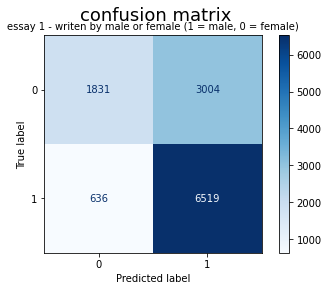

<Figure size 432x288 with 0 Axes>

In [157]:
#classify sex by essays sentences

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

#from preprocessing import preprocess_text

stemmer = PorterStemmer()

print(profiles['sex'].value_counts())
profiles['sex_label'] = profiles['sex'].apply(lambda x: 1 if x == 'm' else 0)
profiles['white_label'] = profiles['white'].apply(lambda x: 1 if x == 'white' else 0)

print(profiles['sex_label'].value_counts())


print(len(profiles['sex_label']))
print(len(words_no_stop))
#print(words_no_stop[0])
#bow_vectorizer = CountVectorizer()

corpus_train, corpus_test, y_train, y_test = train_test_split(my_essay0, profiles['sex_label'], test_size=0.2, random_state=7)
vectorizer_train = TfidfVectorizer(min_df=5, norm=None, stop_words='english')

X_train_counts = vectorizer_train.fit_transform(corpus_train)
vectorizer_test = TfidfVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test_counts = vectorizer_test.fit_transform(corpus_test)

clf = MultinomialNB().fit(X_train_counts, y_train)
preds_test = clf.predict(X_test_counts)
print(preds_test)
print(len(preds_test))
total = 0


plot_confusion_matrix(clf, X_test_counts, y_test,
                                 cmap=plt.cm.Blues)
plt.suptitle('confusion matrix', fontsize=18)
plt.title('essay 1 - writen by male or female (1 = male, 0 = female)',fontsize=10)
plt.show() 
plt.clf()
#print(profiles.iloc[:, [1]].head)
#for i in range(59946):
    #print(clf.predict(vectorizer.transform([my_essay0[i]])))
    #print(profiles['sex_label'][i])
 #   if np.array(clf.predict(vectorizer.transform([my_essay0[i]]))) == profiles['sex_label'][i]:
  #      total= total + 1
        #print(total)
    #else:
     #   total = total       
#print('total = ' + str(total) + ' of 59946 = ' + str(total/59946))
#print(str(35829/(35829+24117)))
#print(clf.predict(vectorizer.transform([my_essay0[i]])))
#print(profiles['sex_label'][i])


score: 0.6014178482068391


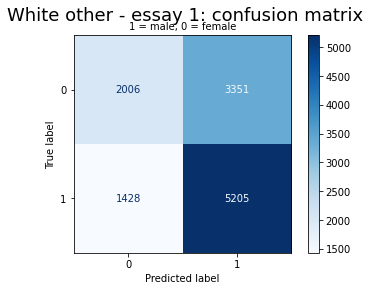

<Figure size 432x288 with 0 Axes>

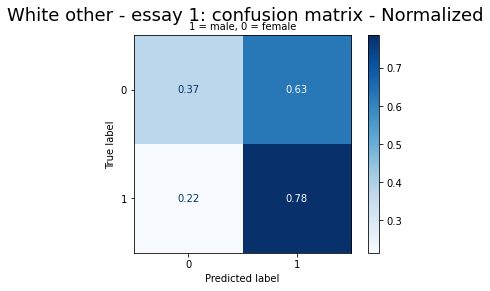

score: 0.5644703919933278


<Figure size 432x288 with 0 Axes>

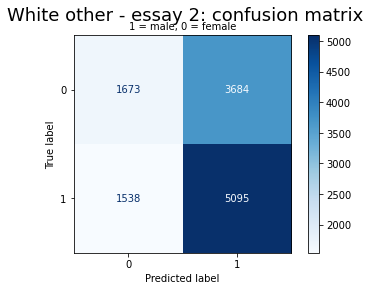

<Figure size 432x288 with 0 Axes>

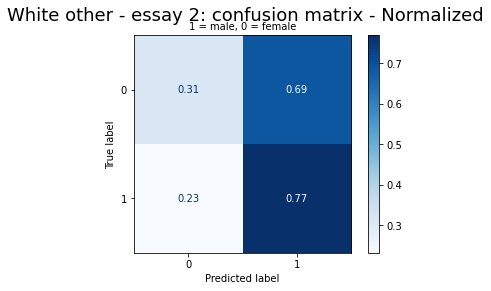

score: 0.5608006672226856


<Figure size 432x288 with 0 Axes>

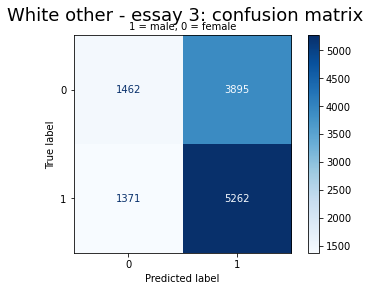

<Figure size 432x288 with 0 Axes>

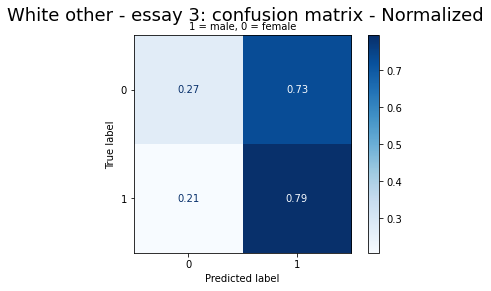

score: 0.5851542952460383


<Figure size 432x288 with 0 Axes>

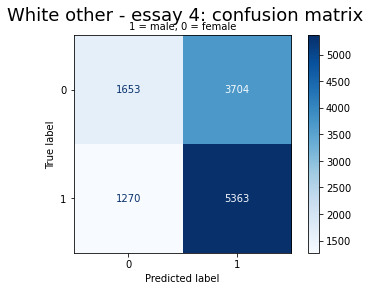

<Figure size 432x288 with 0 Axes>

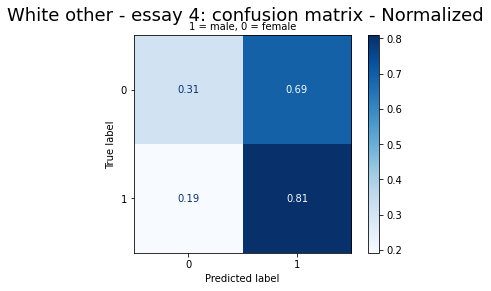

score: 0.6132610508757298


<Figure size 432x288 with 0 Axes>

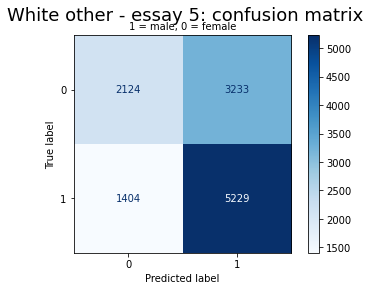

<Figure size 432x288 with 0 Axes>

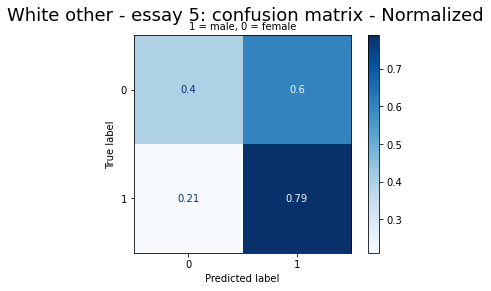

score: 0.5902418682235197


<Figure size 432x288 with 0 Axes>

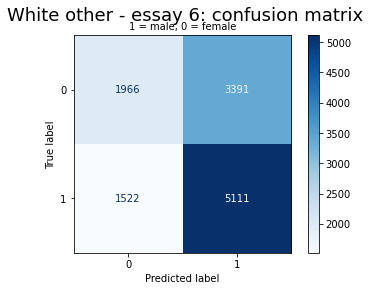

<Figure size 432x288 with 0 Axes>

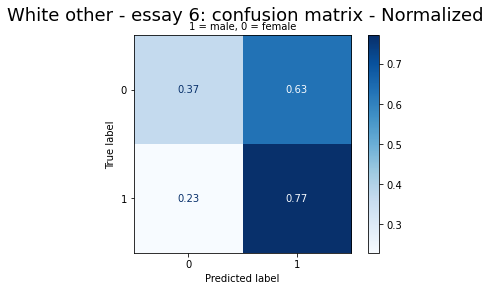

score: 0.5543786488740617


<Figure size 432x288 with 0 Axes>

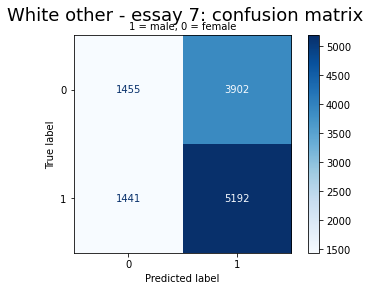

<Figure size 432x288 with 0 Axes>

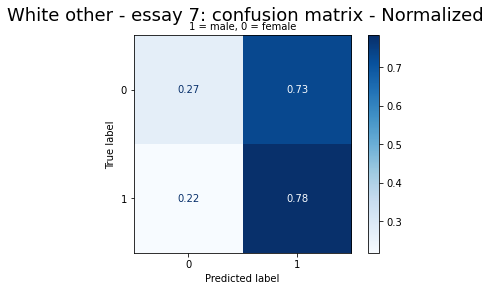

score: 0.5678065054211843


<Figure size 432x288 with 0 Axes>

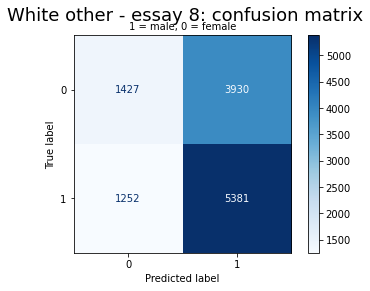

<Figure size 432x288 with 0 Axes>

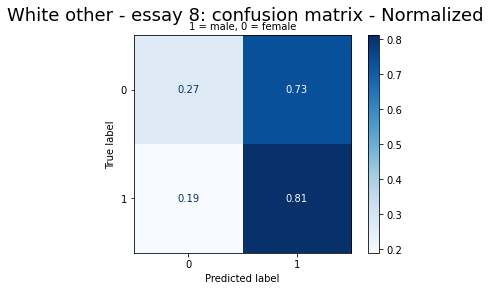

score: 0.5480400333611343


<Figure size 432x288 with 0 Axes>

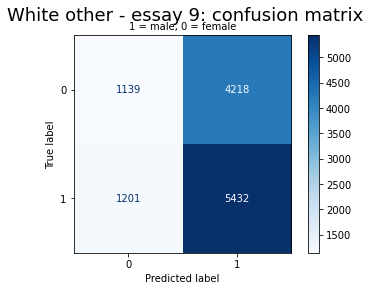

<Figure size 432x288 with 0 Axes>

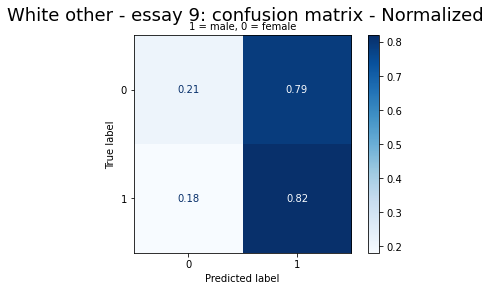

<Figure size 432x288 with 0 Axes>

In [161]:
for i in range(6,15):
    my_essay = profiles.iloc[:,i]
    #print(len(my_essay))
    #print(my_essay[0])
    my_essay = my_essay.replace(np.nan, '', regex=True)
    corpus_train, corpus_test, y_train, y_test = train_test_split(my_essay, profiles['white_label'], test_size=0.2, random_state=7)
    vectorizer_train = TfidfVectorizer( norm=None, stop_words='english')

    X_train_counts = vectorizer_train.fit_transform(corpus_train)
    vectorizer_test = TfidfVectorizer(vocabulary=vectorizer_train.vocabulary_)
    X_test_counts = vectorizer_test.fit_transform(corpus_test)


    clf = MultinomialNB().fit(X_train_counts, y_train)
    #print(X_train_tfidf.shape)
    #print(y_train.shape)
    preds_test = clf.predict(X_test_counts)
    #print(preds_test)
    #print(len(preds_test))
    #total = 0
    print('score: ' + str(clf.score(X_test_counts, y_test)))
    plot_confusion_matrix(clf, X_test_counts, y_test, cmap=plt.cm.Blues)
   
    plt.suptitle('White other - essay ' + str(i - 5)+': confusion matrix', fontsize=18)
    plt.title('1 = male, 0 = female',fontsize=10)
    plt.show() 
    plt.clf()
    
    plot_confusion_matrix(clf, X_test_counts, y_test,
                          cmap=plt.cm.Blues, normalize = 'true')

    plt.suptitle('White other - essay ' + str(i - 5)+': confusion matrix - Normalized', fontsize=18)
    plt.title('1 = male, 0 = female',fontsize=10)
    plt.show() 
    plt.clf()
  

score: 0.684487072560467


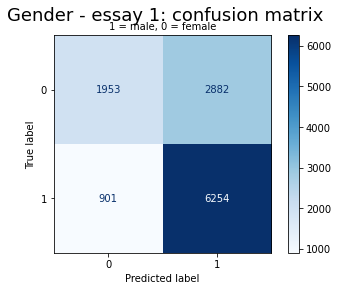

<Figure size 432x288 with 0 Axes>

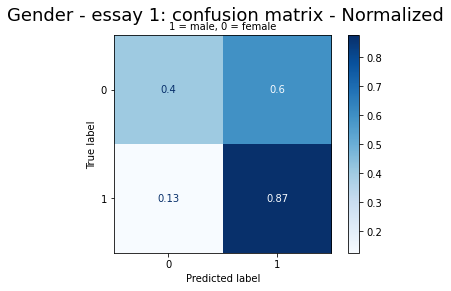

score: 0.645954962468724


<Figure size 432x288 with 0 Axes>

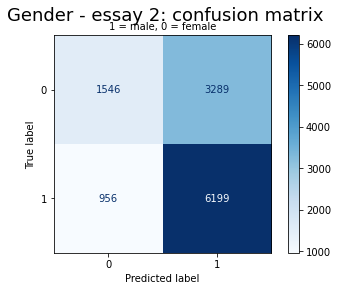

<Figure size 432x288 with 0 Axes>

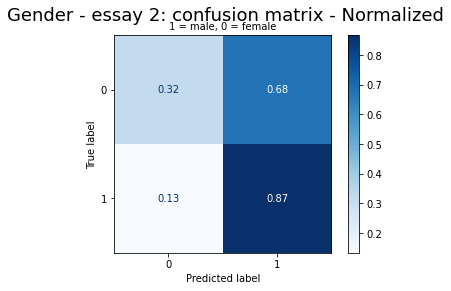

score: 0.6582985821517932


<Figure size 432x288 with 0 Axes>

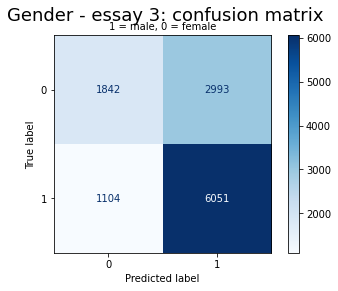

<Figure size 432x288 with 0 Axes>

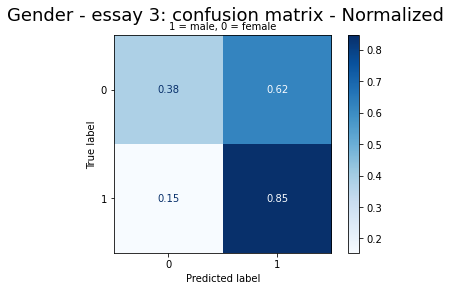

score: 0.658882402001668


<Figure size 432x288 with 0 Axes>

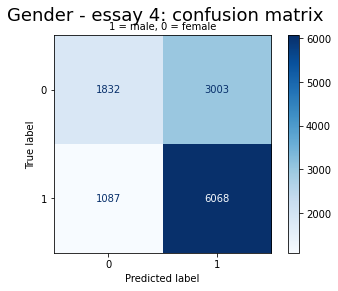

<Figure size 432x288 with 0 Axes>

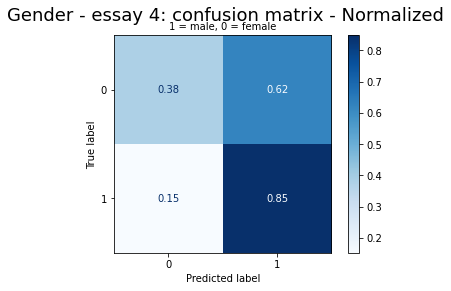

score: 0.6850708924103419


<Figure size 432x288 with 0 Axes>

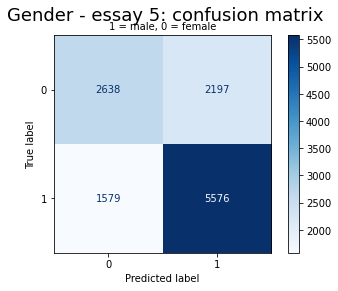

<Figure size 432x288 with 0 Axes>

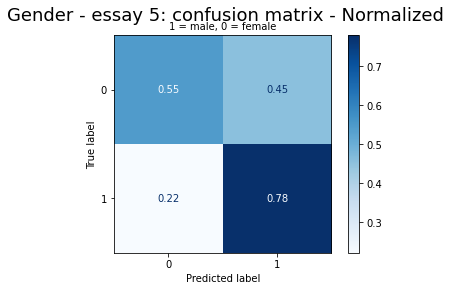

score: 0.6760633861551293


<Figure size 432x288 with 0 Axes>

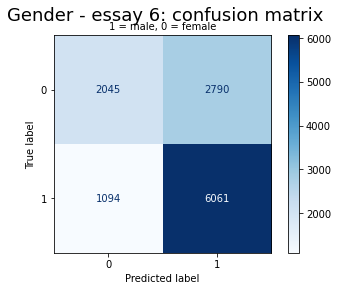

<Figure size 432x288 with 0 Axes>

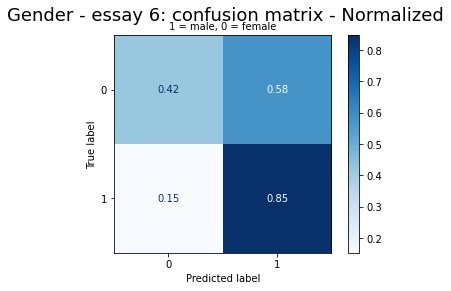

score: 0.6108423686405338


<Figure size 432x288 with 0 Axes>

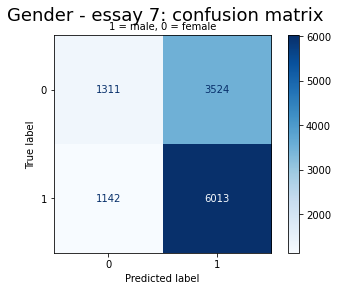

<Figure size 432x288 with 0 Axes>

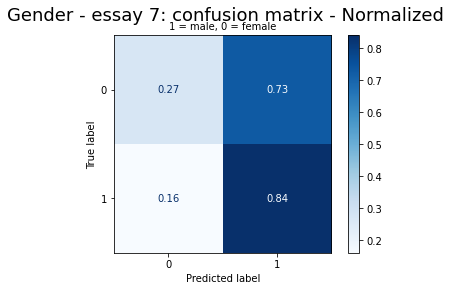

score: 0.6304420350291909


<Figure size 432x288 with 0 Axes>

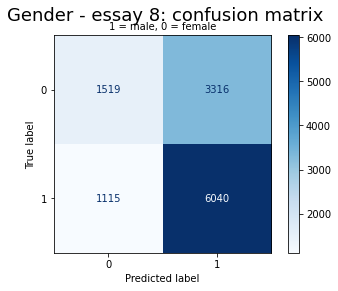

<Figure size 432x288 with 0 Axes>

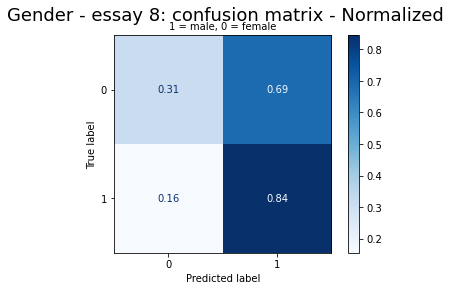

score: 0.5970809007506255


<Figure size 432x288 with 0 Axes>

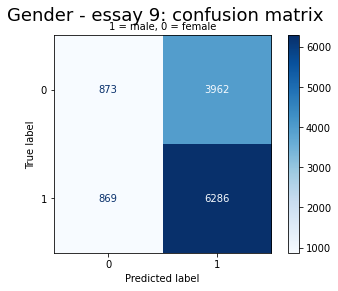

<Figure size 432x288 with 0 Axes>

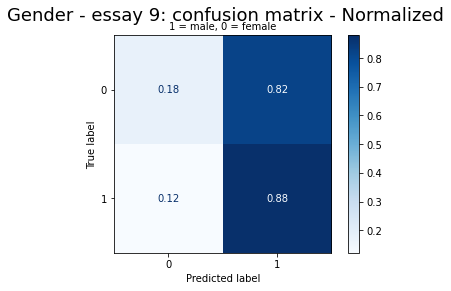

<Figure size 432x288 with 0 Axes>

In [160]:
for i in range(6,15):
    my_essay = profiles.iloc[:,i]
    #print(len(my_essay))
    #print(my_essay[0])
    my_essay = my_essay.replace(np.nan, '', regex=True)
    corpus_train, corpus_test, y_train, y_test = train_test_split(my_essay, profiles['sex_label'], test_size=0.2, random_state=7)
    vectorizer_train = TfidfVectorizer( norm=None, stop_words='english')

    X_train_counts = vectorizer_train.fit_transform(corpus_train)
    vectorizer_test = TfidfVectorizer(vocabulary=vectorizer_train.vocabulary_)
    X_test_counts = vectorizer_test.fit_transform(corpus_test)


    clf = MultinomialNB().fit(X_train_counts, y_train)
    #print(X_train_tfidf.shape)
    #print(y_train.shape)
    preds_test = clf.predict(X_test_counts)
    #print(preds_test)
    #print(len(preds_test))
    #total = 0
    print('score: ' + str(clf.score(X_test_counts, y_test)))
    plot_confusion_matrix(clf, X_test_counts, y_test, cmap=plt.cm.Blues)
   
    plt.suptitle('Gender - essay ' + str(i - 5)+': confusion matrix', fontsize=18)
    plt.title('1 = male, 0 = female',fontsize=10)
    plt.show() 
    plt.clf()
    
    plot_confusion_matrix(clf, X_test_counts, y_test,
                          cmap=plt.cm.Blues, normalize = 'true')

    plt.suptitle('Gender - essay ' + str(i - 5)+': confusion matrix - Normalized', fontsize=18)
    plt.title('1 = male, 0 = female',fontsize=10)
    plt.show() 
    plt.clf()